In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Table of Contents

1. [Load data](#Load-data)
2. [Sample Selection Summary](#Summary-of-the-"sample-selection")
3. [Subdivisions](#Subdivisions)

## Load data

In [27]:
html = pd.read_csv('../data/2_final_webpage_metadata.csv')

In [28]:
html.is_429.value_counts()

0    644439
1      4517
Name: is_429, dtype: int64

In [29]:
html[(html.a_count == 0) & (html.img_count == 0)].website_size_kb.value_counts()

0.000000     633
2.691406     259
2.692383     253
2.693359     232
2.694336     214
            ... 
19.897461      1
6.313477       1
5.724609       1
17.424805      1
61.809570      1
Name: website_size_kb, Length: 13586, dtype: int64

^This may be a problem...

How many HTMLs have we successfully parsed? Filter out all the ones we couldn't

In [30]:
html = html[(html['is_429'] == 0) & (html['is_parsable'] == 1) & (html['file_exists'] == 1)]
print(len(html.index))

644439


Drop those columns now...

In [31]:
html = html.drop(['is_429', 'is_parsable', 'file_exists'], axis=1)

Also only include EntityID's with "completely" finished HTML directories

In [35]:
completely_finished = pd.read_csv('../log-reports/completely-finished.csv')

In [36]:
html = html[html.entityid.isin(completely_finished.entityid)]

# Frequency Distributions for the Binaries

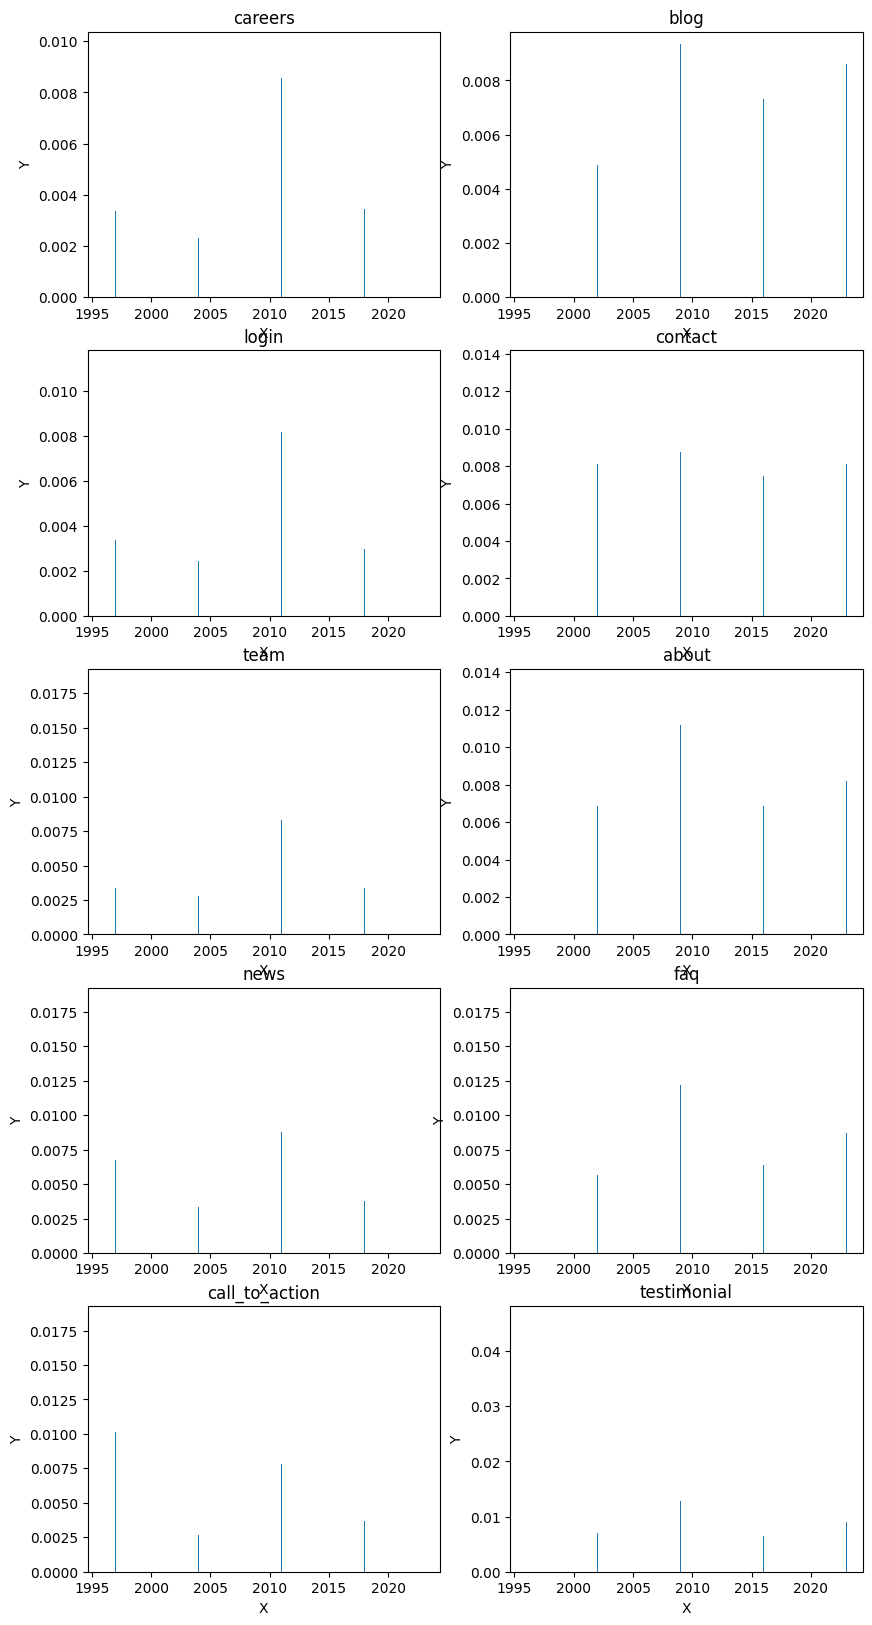

In [55]:
cols = [
    'careers',
    'blog',
    'login',
    'contact',
    'team',
    'about',
    'news',
    'faq',
    'call_to_action',
    'testimonial'
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

for i, ax in enumerate(axes.flatten()):
    grouped_data = html.groupby(html['capture_yr'])[cols[i]].mean()
    x = grouped_data.index
    y = grouped_data
    
    
    ax.bar(x, y, width=0.01)

    # Set title and labels for each subplot
    ax.set_title(cols[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
plt.show()

In [37]:
html.entityid.nunique()

41224

In [45]:
html[(html.a_count == 0) & (html.img_count == 0) & (html.website_size_kb < 3)]

,Unnamed: 0,entityid,capture_yr,capture_m,file_path,website_size_kb,careers,blog,login,contact,...,language,p_count,h_count,img_count,a_count,table_count,form_count,script_count,embedded_js,external_js
199,199,1013765492,2003,7,data/html/1013765492/2003/07/index.html,2.300781,0,0,0,0,...,NaN,0,0,0,0,0,0,3,True,True
200,200,1013765492,2004,1,data/html/1013765492/2004/01/index.html,2.296875,0,0,0,0,...,NaN,0,0,0,0,0,0,3,True,True
201,201,1013765492,2004,6,data/html/1013765492/2004/06/index.html,2.256836,0,0,0,0,...,NaN,0,0,0,0,0,0,3,True,True
346,346,1014886424,2002,7,data/html/1014886424/2002/07/index.html,2.128906,0,0,0,0,...,NaN,1,0,0,0,0,0,3,True,True
365,365,1014886424,2013,1,data/html/1014886424/2013/01/index.html,1.577148,0,0,0,0,...,NaN,0,0,0,0,0,0,3,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648911,648911,1052114150,2023,6,data/html/1052114150/2023/06/index.html,2.315430,0,0,0,0,...,NaN,0,0,0,0,0,0,7,True,True
648912,648912,1052119856,2022,11,data/html/1052119856/2022/11/index.html,1.817383,0,0,0,0,...,NaN,0,0,0,0,0,0,6,True,True
648913,648913,1052119856,2023,3,data/html/1052119856/2023/03/index.html,2.122070,0,0,0,0,...,NaN,0,0,0,0,0,0,6,True,True
648914,648914,1052119856,2023,4,data/html/1052119856/2023/04/index.html,2.138672,0,0,0,0,...,NaN,0,0,0,0,0,0,6,True,True


In [204]:
html = html.drop(columns=['Unnamed: 0'])

How many companies have we downloaded (at-least partially)?

In [205]:
print(html['entityid'].nunique())

44110


Merge data with the input file

In [206]:
in_file = pd.read_csv('../data/startup_url_list.csv')
html = html.merge(in_file, on='entityid')

In [208]:
html.head()

,entityid,capture_yr,capture_m,file_path,website_size_kb,careers,blog,login,contact,team,...,form_count,script_count,embedded_js,external_js,weburl,pb_companyid,startdate,lastVC,ownershipstatus,exit_date
0,1006526630,2001,3,data/html/1006526630/2001/03/index.html,4.592773,0,0,0,0,0,...,1,3,True,True,www.usclaims.com,NaN,1996-06-01,2020-01-01,Acquired/Merged,NaN
1,1006526630,2001,5,data/html/1006526630/2001/05/index.html,4.822266,0,0,0,0,0,...,1,3,True,True,www.usclaims.com,NaN,1996-06-01,2020-01-01,Acquired/Merged,NaN
2,1006526630,2002,5,data/html/1006526630/2002/05/index.html,2.606445,0,0,0,0,0,...,0,3,True,True,www.usclaims.com,NaN,1996-06-01,2020-01-01,Acquired/Merged,NaN
3,1006526630,2002,11,data/html/1006526630/2002/11/index.html,2.604492,0,0,0,0,0,...,0,3,True,True,www.usclaims.com,NaN,1996-06-01,2020-01-01,Acquired/Merged,NaN
4,1006526630,2003,6,data/html/1006526630/2003/06/index.html,2.595703,0,0,0,0,0,...,0,3,True,True,www.usclaims.com,NaN,1996-06-01,2020-01-01,Acquired/Merged,NaN


In [209]:
html.dtypes.to_dict()

{'entityid': dtype('int64'),
 'capture_yr': dtype('int64'),
 'capture_m': dtype('int64'),
 'file_path': dtype('O'),
 'website_size_kb': dtype('float64'),
 'careers': dtype('int64'),
 'blog': dtype('int64'),
 'login': dtype('int64'),
 'contact': dtype('int64'),
 'team': dtype('int64'),
 'about': dtype('int64'),
 'news': dtype('int64'),
 'faq': dtype('int64'),
 'call_to_action': dtype('int64'),
 'testimonial': dtype('int64'),
 'title': dtype('O'),
 'description': dtype('O'),
 'keywords': dtype('O'),
 'author': dtype('O'),
 'language': dtype('O'),
 'p_count': dtype('int64'),
 'h_count': dtype('int64'),
 'img_count': dtype('int64'),
 'a_count': dtype('int64'),
 'table_count': dtype('int64'),
 'form_count': dtype('int64'),
 'script_count': dtype('int64'),
 'embedded_js': dtype('O'),
 'external_js': dtype('O'),
 'weburl': dtype('O'),
 'pb_companyid': dtype('O'),
 'startdate': dtype('O'),
 'lastVC': dtype('O'),
 'ownershipstatus': dtype('O'),
 'exit_date': dtype('O')}

## Summary of the "sample selection"

## Subdivisions

For all companies that have survived at least *n* years, divide that into exited and non-exited companies...

Let's start with 5. And then move to 10

Let's add some columns that will enable us to do this easier

In [211]:
html["has_exit"] = (html["exit_date"].isna() == False).astype('int8')
html["end_yr"] = html["exit_date"].str.slice(start=0, stop=4).astype('float' ,errors='ignore').fillna(2023)
html["start_yr"] = html["startdate"].str.slice(start=0, stop=4).fillna(html["lastVC"].str.slice(start=0, stop=4)).astype('float', errors='ignore')
html["lifespan"] = html["end_yr"] - html["start_yr"]

Create a new DF that contains companies that were founded in 2012 and survived at least 5 years

In [226]:
survived_5 = html[(html["lifespan"] > 5) & (html["start_yr"] == 2012)]

Of the companies that survived at least five years, how *many* had an exit? How many didn't?

In [227]:
print(survived_5[survived_5["has_exit"] == 1]['entityid'].nunique())
print(survived_5[survived_5["has_exit"] == 0]['entityid'].nunique())

297
1655


Divide these into two seperate DFs - "exited" and "alive"

In [229]:
s5_exit = survived_5[survived_5["has_exit"] == 1]
s5_alive = survived_5[survived_5["has_exit"] == 0]

Do these companies begin to go in different directions, after, say, year 2?

Am I trying to measure the change in companies *in aggregate* or on a company-by-company basis (i.e. bootstrap)?

Let's just start with "in aggregate", so essentially measuring averages

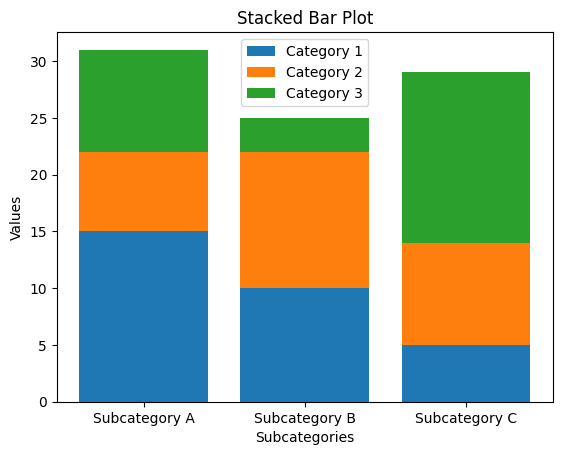

In [3]:
categories = ['Category 1', 'Category 2', 'Category 3']
subcategories = ['Subcategory A', 'Subcategory B', 'Subcategory C']

values1 = [15, 10, 5]
values2 = [7, 12, 9]
values3 = [9, 3, 15]

bottom = np.zeros(len(subcategories))
bars = []
for value in [values1, values2, values3]:
    bars.append(plt.bar(subcategories, value, bottom=bottom))
    bottom += value

plt.xlabel('Subcategories')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')
plt.legend(bars, categories)

plt.show()